<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/ML-Manuel/RF%26LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PreProcessing

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [16]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 550 (delta 101), reused 27 (delta 25), pack-reused 385 (from 1)
Receiving objects: 100% (550/550), 62.34 MiB | 14.19 MiB/s, done.
Resolving deltas: 100% (286/286), done.
/content/DATCapstone/data/DATCapstone/data/DATCapstone/data


In [17]:
from zipfile import ZipFile
import pandas as pd

# Explicitly extract data.csv from ZIP
with ZipFile('_data.csv.zip', 'r') as z:
    with z.open('data.csv') as f:  # Ignore macOS metadata files
        df = pd.read_csv(f, index_col=0)

# Convert date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Ticker', 'Date'])


In [18]:


df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_763,emb_764,emb_765,emb_766,emb_767,Target_1day,Target_1week,Target_1month,Target_1year,Ticker
149,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,NaN,NaN,NaN,NaN,NaN,1.128571,1.756653,10.863785,9.008606,AAPL
152,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,-3.444626,0.245331,7.016815,0.616699,AAPL
155,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,1.933334,3.601639,9.637100,-0.162491,AAPL
158,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,0.873398,0.392532,8.744034,2.098389,AAPL
161,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,NaN,NaN,NaN,NaN,NaN,1.265976,-1.069687,9.313263,4.827057,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,2025-01-27,394.799988,406.690002,389.000000,397.149994,58125500,0.0,0.0,29723.864,4.0,...,1.174326,-0.262426,0.298183,0.182200,0.388200,0.940002,NaN,NaN,NaN,TSLA
8072,2025-01-28,396.910004,400.589996,386.500000,398.089996,48910700,0.0,0.0,29723.864,4.0,...,0.084330,-0.354550,-0.611864,-0.449780,0.584349,-8.989990,NaN,NaN,NaN,TSLA
8082,2025-01-29,395.209991,398.589996,384.480011,389.100006,68033600,0.0,0.0,29723.864,4.0,...,0.827862,-0.620100,-0.024186,-0.439615,0.781107,11.179993,NaN,NaN,NaN,TSLA
8092,2025-01-30,410.779999,412.500000,384.410004,400.279999,98092900,0.0,0.0,29723.864,4.0,...,1.383147,-0.616897,-0.145329,-0.418483,0.636253,4.320007,NaN,NaN,NaN,TSLA


In [19]:
#Read Data
# df = pd.read_csv('/Users/wonminkim/Projects/DATCapstone/data2/data.csv', index_col=0)
# Correct path for ZIP file
zip_path = '/content/DATCapstone/data/_data.csv.zip'

# Extract specific file from ZIP
with ZipFile(zip_path, 'r') as z:
    with z.open('data.csv') as f:  # Explicitly specify the file to extract
        df = pd.read_csv(f, index_col=0)


df['Date'] = pd.to_datetime(df['Date'])

#Forward fill -> micro, macro, stock / fill na -> sentiment
df[df.columns[1:40]] = df.groupby('Ticker')[df.columns[1:40]].ffill()
df[df.columns[40:-5]] = df[df.columns[40:-5]].fillna(0)

df = df.dropna(subset=df.columns[0:-5])

# Sorting
df = df.sort_values(by=['Ticker', 'Date']).reset_index(drop=True)

# Lag feature (Exclude embedding columns)
lag_cols = df.columns[1:44]
lags = [1, 3, 5, 7, 14, 30]
lag_features = []

for col in lag_cols:
    for lag in lags:
        lagged = df.groupby('Ticker')[col].shift(lag)
        lag_features.append(lagged.rename(f'{col}_lag{lag}'))

lag_df = pd.concat(lag_features, axis=1)

df = pd.concat([df.reset_index(drop=True), lag_df.reset_index(drop=True)], axis=1)

In [20]:
!git clone -b ML-Manuel https://github.com/ManuelBagasina/DATCapstone.git
%cd DATCapstone/data

Cloning into 'DATCapstone'...
remote: Enumerating objects: 550, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 550 (delta 101), reused 27 (delta 25), pack-reused 385 (from 1)
Receiving objects: 100% (550/550), 62.34 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (286/286), done.
/content/DATCapstone/data/DATCapstone/data/DATCapstone/data/DATCapstone/data


In [21]:
import glob
import pandas as pd

# Correct path for article CSVs in Google Colab
csv_files = glob.glob('/content/DATCapstone/data/*articles*.csv')
print("Found files:", csv_files)  # Debugging


Found files: ['/content/DATCapstone/data/AAPL_articles.csv', '/content/DATCapstone/data/AVGO_articles..csv', '/content/DATCapstone/data/AMZN_articles..csv', '/content/DATCapstone/data/TSLA_articles..csv', '/content/DATCapstone/data/NFLX_articles..csv', '/content/DATCapstone/data/MSFT_articles..csv', '/content/DATCapstone/data/ADBE_articles.csv', '/content/DATCapstone/data/GOOGL_articles..csv', '/content/DATCapstone/data/NVDA_articles..csv', '/content/DATCapstone/data/META_articles..csv']


In [22]:
!ls /content/DATCapstone/data/*articles*.csv


/content/DATCapstone/data/AAPL_articles.csv
/content/DATCapstone/data/ADBE_articles.csv
/content/DATCapstone/data/AMZN_articles..csv
/content/DATCapstone/data/AVGO_articles..csv
/content/DATCapstone/data/GOOGL_articles..csv
/content/DATCapstone/data/META_articles..csv
/content/DATCapstone/data/MSFT_articles..csv
/content/DATCapstone/data/NFLX_articles..csv
/content/DATCapstone/data/NVDA_articles..csv
/content/DATCapstone/data/TSLA_articles..csv


In [23]:
if not csv_files:
    print("No article files found. Initializing empty columns.")
    df_articles = pd.DataFrame(columns=['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive'])
else:
    # Your existing processing code
    df_articles_list = []
    for file in csv_files:
        ticker = os.path.basename(file).split('_')[0]
        df_articles = pd.read_csv(file)
        df_articles['Ticker'] = ticker
        df_articles_list.append(df_articles)

    df_articles = pd.concat(df_articles_list, ignore_index=True)

    # Preprocessing steps...
# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [24]:
import glob

# Read articles df
csv_files = glob.glob(os.path.join("*_articles*.csv")) # Updated to reflect file naming pattern

df_articles_list = []

for file in csv_files:
    # get ticker from filename
    ticker = os.path.basename(file).split('_')[0]
    df_articles = pd.read_csv(file)
    df_articles['Ticker'] = ticker
    df_articles_list.append(df_articles)

# concat articles dataframe
df_articles = pd.concat(df_articles_list, ignore_index=True)

# Articles dataframe preprocessing
df_articles["Date"] = pd.to_datetime(df_articles["time"], errors='coerce', utc=True).dt.tz_convert(None).dt.date
df_articles = df_articles[['Date', 'Ticker', 'sentiment']]
sentiment_dummies = pd.get_dummies(df_articles['sentiment'])
df_encoded = pd.concat([df_articles[['Date', 'Ticker']], sentiment_dummies], axis=1)
df_articles = df_encoded.groupby(['Date', 'Ticker']).sum().reset_index()
df_articles['Date'] = pd.to_datetime(df_articles['Date'])

df_articles['articles_avg_sentiment'] = (df_articles['Negative'] * -1 + df_articles['Neutral'] * 0 + df_articles['Positive']) / (df_articles['Negative'] + df_articles['Neutral'] + df_articles['Positive'])
df_articles.columns = ['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral', 'Articles_positive', 'Articles_avg_sentiment']
df_articles

df = pd.merge(df, df_articles, on=['Date', 'Ticker'], how = 'left')

# Fill 0 except the target columns
df[[col for col in df.columns if 'Target' not in col]] = df[[col for col in df.columns if 'Target' not in col]].fillna(0)

In [25]:
print(df_articles.columns)

Index(['Date', 'Ticker', 'Articles_Negative', 'Articles_Neutral',
       'Articles_positive', 'Articles_avg_sentiment'],
      dtype='object')


# ML Linear


In [ ]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=0.95, random_state=42)
emb_cols = [col for col in df.columns if col.startswith("emb_")]
X_emb = df[emb_cols]
X_emb_pca = pca.fit_transform(X_emb)

# PCA columns
pca_columns = [f"emb_pca_{i}" for i in range(X_emb_pca.shape[1])]
df_pca_part = pd.DataFrame(X_emb_pca, columns=pca_columns, index=df.index)
df_non_pca = df.drop(columns=emb_cols)

df_pca = pd.concat([df_non_pca.reset_index(drop=True), df_pca_part.reset_index(drop=True)], axis=1)

# 결과 확인
df_pca.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,GDP (Billions USD),Unemployment Rate (%),...,emb_pca_74,emb_pca_75,emb_pca_76,emb_pca_77,emb_pca_78,emb_pca_79,emb_pca_80,emb_pca_81,emb_pca_82,emb_pca_83
0,2021-09-30,140.983670,141.690258,138.648004,138.863907,89056700,0.0,0.0,23921.991,4.7,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
1,2021-10-01,139.256450,140.257452,136.518433,139.992477,94639600,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
2,2021-10-04,139.119037,139.560665,135.694064,136.547852,98322000,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
3,2021-10-05,136.891371,139.590139,136.763788,138.481186,80861100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022
4,2021-10-06,136.871718,139.501783,135.792205,139.354584,83221100,0.0,0.0,24777.038,4.5,...,-0.000573,-0.000315,-0.000716,-0.000052,0.000158,0.000176,0.000412,-0.000354,-0.000744,0.000022


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def random_forest(data, target):
    df = data.copy()
    remove_target_col = [col for col in df.columns if 'Target' in col]
    remove_target_col.remove(target)

    # Drop other Targets and NaNs
    df = df.drop(columns=remove_target_col)
    df = df.dropna(subset=[target])

    # Date processing
    df['Date'] = pd.to_datetime(df['Date'])

    # One-hot encode Ticker
    df = pd.get_dummies(df, columns=['Ticker'], drop_first=True)

    # X, y
    y = df[target]
    X = df.drop(columns=['Date', target])

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    }

    # GridSearchCV
    grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                               param_grid,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1,
                               verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("Best Parameters:")
    print(grid_search.best_params_)

    # Prediction
    y_pred = best_model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization
    test_index = np.arange(len(y_test))
    plt.figure(figsize=(14, 6))
    plt.plot(test_index, y_test.values, label='Actual', linewidth=2)
    plt.plot(test_index, y_pred, label='Predicted', linewidth=2)
    plt.title(f'{target}: Actual vs Predicted')
    plt.xlabel('Test Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': 20, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 20.3420
Mean Absolute Error (MAE): 2.9514
R² Score: -0.5414


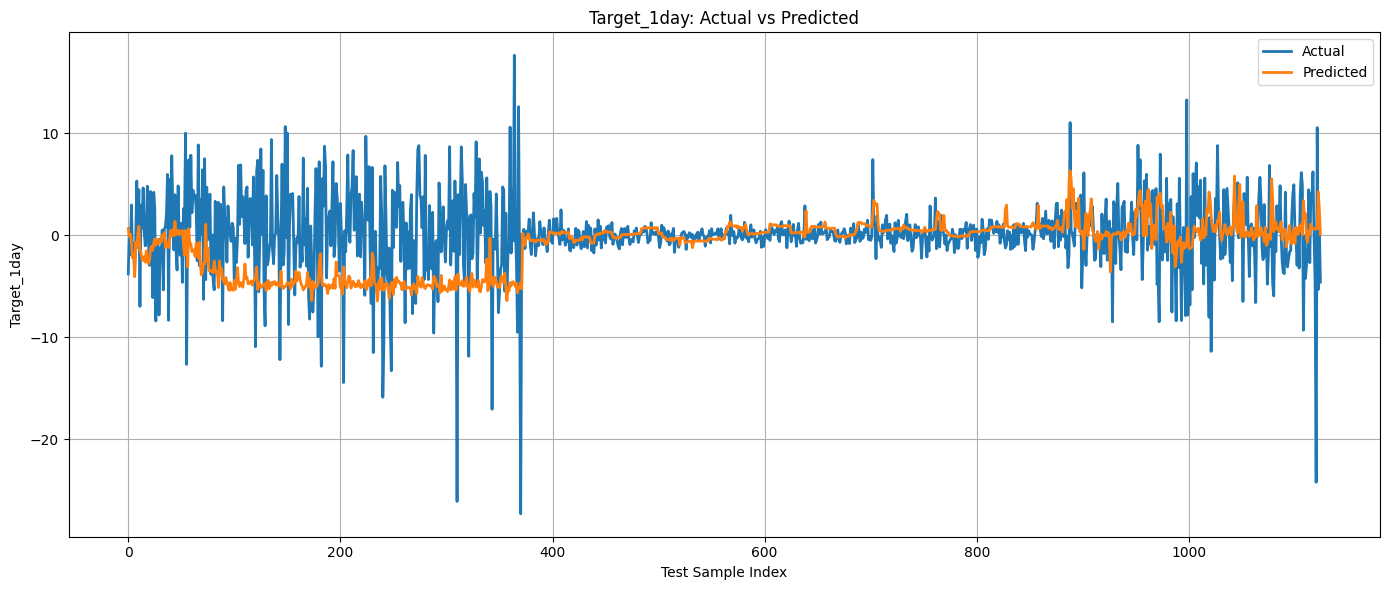

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': 10, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 50.5446
Mean Absolute Error (MAE): 4.9216
R² Score: 0.1119


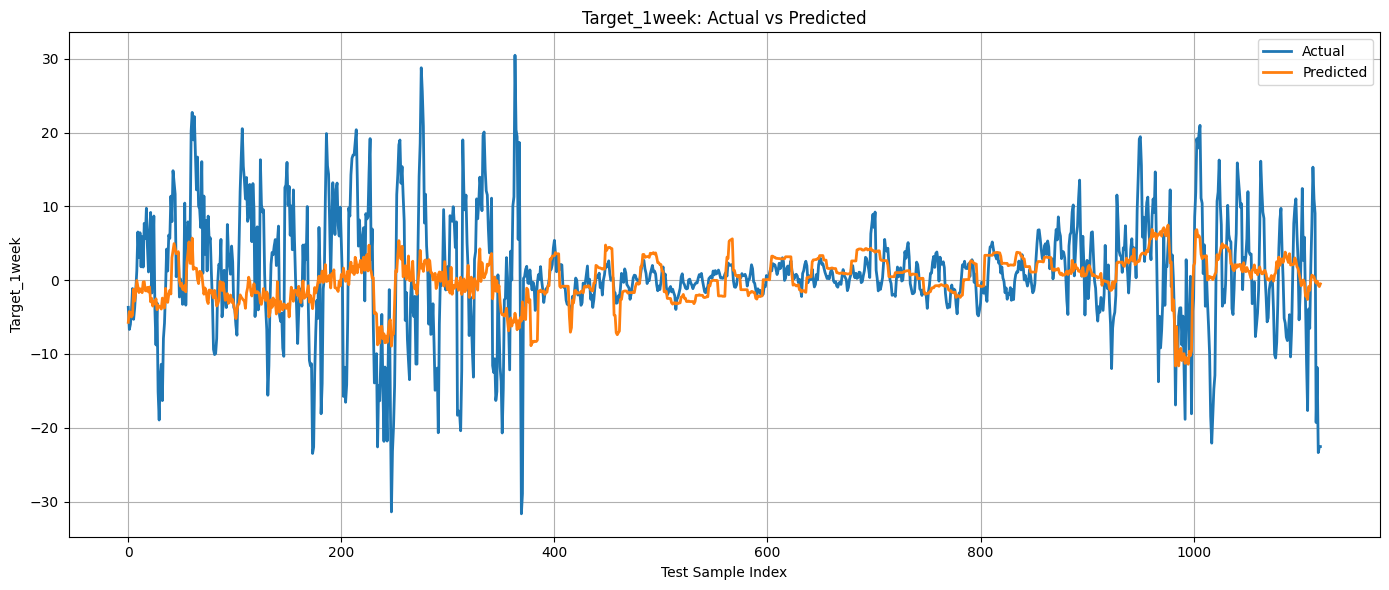

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters:
{'max_depth': None, 'n_estimators': 100}

 Evaluation:
Mean Squared Error (MSE): 179.8273
Mean Absolute Error (MAE): 9.6425
R² Score: 0.0685


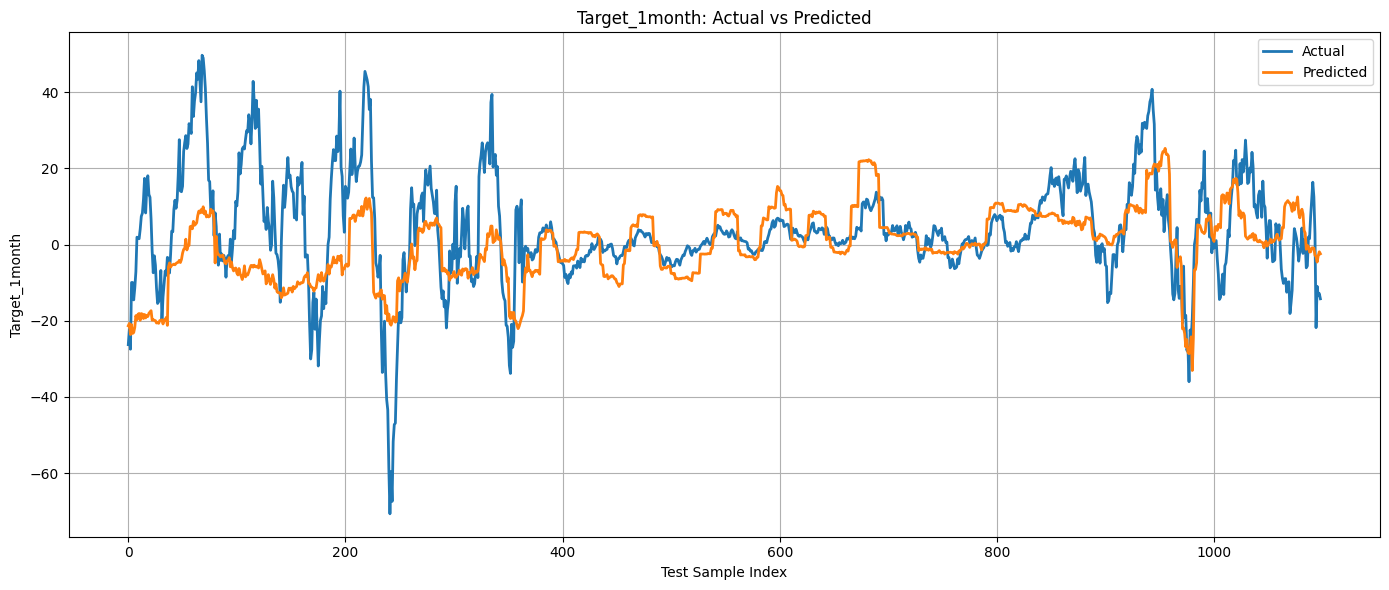

Fitting 3 folds for each of 6 candidates, totalling 18 fits


KeyboardInterrupt: 

In [14]:
random_forest(df, 'Target_1day')
random_forest(df, 'Target_1week')
random_forest(df, 'Target_1month')
random_forest(df, 'Target_1year')

In [ ]:
random_forest(df_pca, 'Target_1day')
random_forest(df_pca, 'Target_1week')
random_forest(df_pca, 'Target_1month')
random_forest(df_pca, 'Target_1year')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

def lightgbm_model(data, target):
    df = data.copy()

    # Target setting
    remove_target_col = [col for col in df.columns if 'Target' in col]
    remove_target_col.remove(target)
    df = df.drop(columns=remove_target_col)
    df = df.dropna(subset=[target])

    df['Date'] = pd.to_datetime(df['Date'])

    # Ticker encoding
    df = pd.get_dummies(df, columns=['Ticker'], drop_first=True)

    # X, y
    y = df[target]
    X = df.drop(columns=['Date', target])

    # Standardization
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    # Hyperparameter
    param_grid = {
        'num_leaves': [31, 63],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [100, 200]
    }

    # GridSearchCV
    model = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbosity=-1)
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=3,
                               scoring='neg_mean_squared_error',
                               verbose=0,
                               n_jobs=-1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("Best Parameters:")
    print(grid_search.best_params_)

    # Prediction
    y_pred = best_model.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n Evaluation:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

    # Visualization
    test_index = np.arange(len(y_test))
    plt.figure(figsize=(14, 6))
    plt.plot(test_index, y_test.values, label='Actual', linewidth=2)
    plt.plot(test_index, y_pred, label='Predicted', linewidth=2)
    plt.title(f'{target}: Actual vs Predicted (LightGBM)')
    plt.xlabel('Test Sample Index')
    plt.ylabel(target)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
lightgbm_model(df, 'Target_1day')
lightgbm_model(df, 'Target_1week')
lightgbm_model(df, 'Target_1month')
lightgbm_model(df, 'Target_1year')

In [ ]:
lightgbm_model(df_pca, 'Target_1day')
lightgbm_model(df_pca, 'Target_1week')
lightgbm_model(df_pca, 'Target_1month')
lightgbm_model(df_pca, 'Target_1year')

# TFT

## Functional, needs improvement

In [26]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'GDP (Billions USD)', 'Unemployment Rate (%)',
       ...
       'positive_lag14', 'positive_lag30', 'Articles_Negative_x',
       'Articles_Neutral_x', 'Articles_positive_x', 'Articles_avg_sentiment_x',
       'Articles_Negative_y', 'Articles_Neutral_y', 'Articles_positive_y',
       'Articles_avg_sentiment_y'],
      dtype='object', length=1083)


In [28]:
!pip install pytorch_forecasting
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 818.9/818.9 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [38]:
import torch
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint
from pytorch_forecasting.data.encoders import GroupNormalizer
from pytorch_forecasting.metrics import QuantileLoss
from sklearn.decomposition import PCA

In [39]:
# Data Prep
required_columns = ['Date', 'Ticker', 'Target_1day', 'Open', 'High', 'Low', 'Close',
                   'Volume', 'GDP (Billions USD)', 'Unemployment Rate (%)',
                   'positive', 'neutral', 'negative'] + [f"emb_{i}" for i in range(768)]

df = df[required_columns].sort_values(by=['Ticker', 'Date'])

# Create time index
df["time_idx"] = df.groupby("Ticker").cumcount()


In [40]:
# Define TimeSeriesDataSet ⚙️
max_encoder_length = 30  # 30-day lookback window
max_prediction_length = 1  # 1-day prediction

training_cutoff = int(df["time_idx"].max() * 0.8)  # 80-20 time-based split

training = TimeSeriesDataSet(
    df[df.time_idx <= training_cutoff],
    time_idx="time_idx",
    target="Target_1day",
    group_ids=["Ticker"],
    static_categoricals=["Ticker"],
    time_varying_known_reals=[
        'Open', 'High', 'Low', 'Volume',
        'GDP (Billions USD)', 'Unemployment Rate (%)'
    ],
    time_varying_unknown_reals=[
        'Close', 'positive', 'negative', 'neutral'
    ] + [f"emb_{i}" for i in range(768)],
    max_encoder_length=max_encoder_length,
    max_prediction_length=max_prediction_length,
    target_normalizer=GroupNormalizer(groups=["Ticker"], transformation="softplus"),
)

In [41]:
# Dataloaders
batch_size = 64
train_dataloader = training.to_dataloader(train=True, batch_size=batch_size, num_workers=4)
val_dataloader = training.to_dataloader(train=False, batch_size=batch_size, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [42]:
# Configure TFT Model
tft = TemporalFusionTransformer.from_dataset(
    training,
    hidden_size=32,
    lstm_layers=2,
    dropout=0.1,
    output_size=7,  # Changed to 7 to match the desired number of quantiles
    loss=QuantileLoss(quantiles=[0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98]), # Explicitly set quantiles
    learning_rate=0.03,
)

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.


In [43]:
# Train Model
checkpoint_callback = ModelCheckpoint(
    dirpath="checkpoints",
    filename="best-tft-{epoch}-{val_loss:.2f}",
    save_top_k=1,
    monitor="val_loss"
)

# Create ModelCheckpoint instance
trainer = pl.Trainer(
    max_epochs=50,
    accelerator="auto",  # Automatically detects GPU/TPU
    devices="auto",      # Uses all available devices
    callbacks=[
        EarlyStopping(monitor="val_loss", patience=10),
        LearningRateMonitor(),
        checkpoint_callback
    ],
    enable_progress_bar=True,
    enable_model_summary=True
)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


### Running will take a while

In [44]:
# Evaluate Model
predictions = tft.predict(val_dataloader)
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])

# Check MAE
mae = (actuals - predictions).abs().mean()
print(f"MAE: {mae:.2f}")

INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


MAE: 2.58


## Visuals of Model Performance

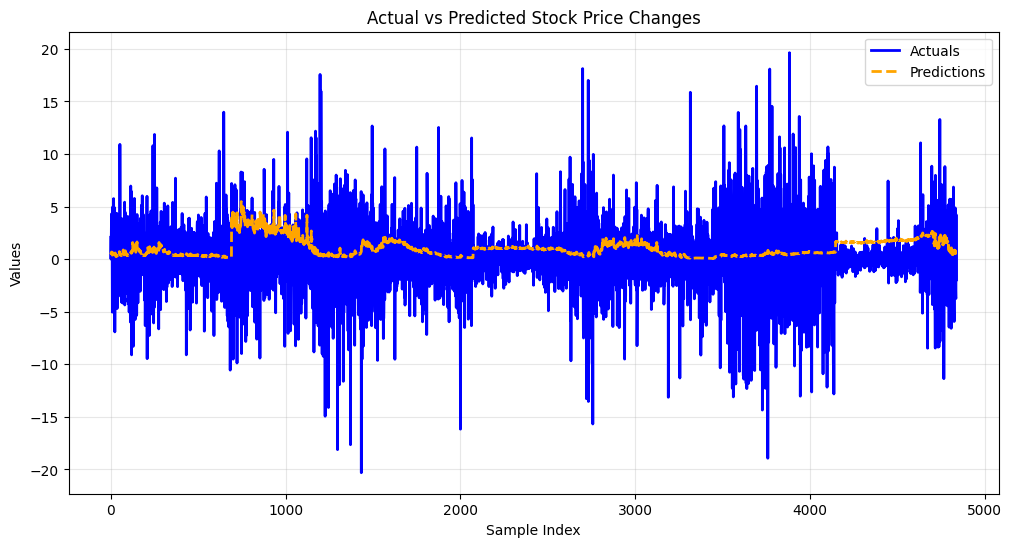

In [45]:
# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(actuals.numpy(), label="Actuals", color="blue", linewidth=2)
plt.plot(predictions.numpy(), label="Predictions", color="orange", linestyle="--", linewidth=2)
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Stock Price Changes")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


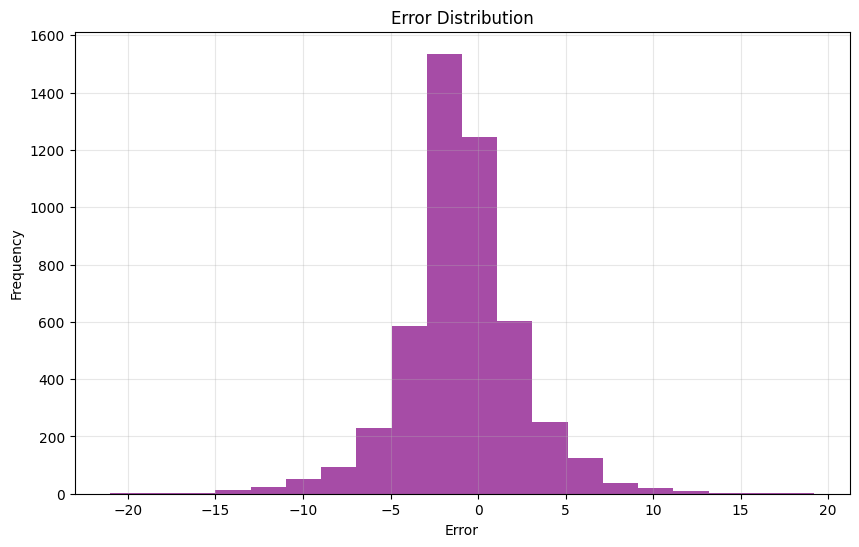

In [46]:
# Calculate errors
errors = actuals.numpy() - predictions.numpy()

# Plot error distribution
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, color="purple", alpha=0.7)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.grid(alpha=0.3)
plt.show()


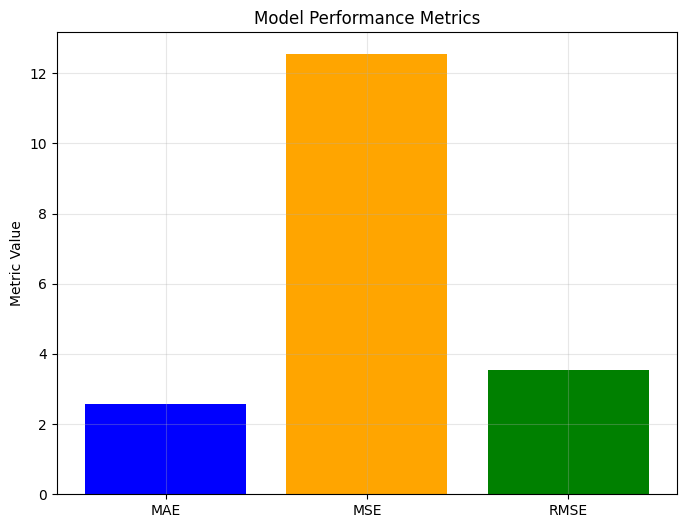

In [47]:
# Example metrics
metrics = {"MAE": mae.item(), "MSE": (errors**2).mean(), "RMSE": (errors**2).mean()**0.5}

# Plot metrics summary
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=["blue", "orange", "green"])
plt.ylabel("Metric Value")
plt.title("Model Performance Metrics")
plt.grid(alpha=0.3)
plt.show()


In [48]:
#Save Model 💾
torch.save(tft.state_dict(), "tft_model.pth")

## Testing (doesn't work)

### Setup

In [160]:
#!pip install --upgrade lightning pytorch-forecasting
#!pip install "lightning>=2.0" "pytorch-forecasting>=0.10"

In [161]:
import lightning.pytorch as pl
from lightning.pytorch.callbacks import EarlyStopping, ModelCheckpoint, LearningRateMonitor
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
import pandas as pd
import torch


In [162]:
%cd /content

/content


In [163]:
# Set global parameters
TARGETS = ['Target_1day', 'Target_1week', 'Target_1month', 'Target_1year']
TICKER_COL = 'Ticker'
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [164]:
### 2. Data Preparation

def prepare_tft_data(df):
    """Process DataFrame for TFT with technical indicators and lag features"""
    df = df.copy().sort_values([TICKER_COL, 'Date'])

    # Create time index
    df['time_idx'] = df.groupby(TICKER_COL).cumcount()

    # Technical indicators (from Project_Plan.pdf)
    if 'Close' in df.columns:
        # RSI
        delta = df.groupby(TICKER_COL)['Close'].diff()
        gain = delta.where(delta > 0, 0)
        loss = -delta.where(delta < 0, 0)
        avg_gain = gain.rolling(14).mean()
        avg_loss = loss.rolling(14).mean()
        df['RSI'] = 100 - (100 / (1 + (avg_gain/avg_loss)))

        # MACD
        df['EMA12'] = df.groupby(TICKER_COL)['Close'].transform(lambda x: x.ewm(span=12).mean())
        df['EMA26'] = df.groupby(TICKER_COL)['Close'].transform(lambda x: x.ewm(span=26).mean())
        df['MACD'] = df['EMA12'] - df['EMA26']
        df['MACD_Signal'] = df['MACD'].ewm(span=9).mean()

    # Lag features (from RF-LightGBM.ipynb)
    lag_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in lag_cols:
        for lag in [1, 3, 5, 7, 14, 30]:
            df[f'{col}_lag{lag}'] = df.groupby(TICKER_COL)[col].shift(lag)

    # Fill missing values (from Data_Collection.ipynb)
    df = df.ffill().bfill()

    return df

In [165]:
### 3. TFT Dataset Creation

def create_tft_datasets(df, target, encoder_length, prediction_length):
    """Create TimeSeriesDataSet objects with dynamic feature selection"""
    # Feature selection (from column_names.txt)
    known_reals = [
        'Open', 'High', 'Low', 'Volume',
        'RSI', 'MACD', 'MACD_Signal'
    ] + [col for col in df.columns if 'emb_pca_' in col]

    unknown_reals = [
        'Close', 'negative', 'neutral', 'positive',
        'Articles_Negative', 'Articles_Neutral', 'Articles_positive'
    ]

    # Filter existing columns
    known_reals = [col for col in known_reals if col in df.columns]
    unknown_reals = [col for col in unknown_reals if col in df.columns]

    # Training/validation split
    training_cutoff = int(df['time_idx'].max() * 0.8)

    training = TimeSeriesDataSet(
        df[df.time_idx <= training_cutoff],
        time_idx="time_idx",
        target=target,
        group_ids=[TICKER_COL],
        time_varying_known_reals=known_reals,
        time_varying_unknown_reals=unknown_reals,
        max_encoder_length=encoder_length,
        max_prediction_length=prediction_length,
        static_categoricals=[TICKER_COL],
        target_normalizer=GroupNormalizer(groups=[TICKER_COL], transformation="softplus")
    )

    validation = TimeSeriesDataSet.from_dataset(training, df, predict=True)

    return training, validation

In [166]:
### 4. Model Training & Evaluation

def train_tft_model(training, val_data, target):
    """Train and evaluate TFT model with horizon-specific parameters"""
     # Fix 1: Define explicit checkpoint directory
    checkpoint_dir = "/content/checkpoints"  # Absolute path
    os.makedirs(checkpoint_dir, exist_ok=True)

    # Hyperparameters (from challenges.pdf)
    params = {
        'Target_1day': {'hidden': 64, 'lr': 0.01, 'heads': 4},
        'Target_1week': {'hidden': 128, 'lr': 0.005, 'heads': 8},
        'Target_1month': {'hidden': 256, 'lr': 0.003, 'heads': 8},
        'Target_1year': {'hidden': 512, 'lr': 0.001, 'heads': 16}
    }[target]

    tft = TemporalFusionTransformer.from_dataset(
        training,
        hidden_size=params['hidden'],
        attention_head_size=params['heads'],
        learning_rate=params['lr'],
        dropout=0.1,
        lstm_layers=2,
        loss=QuantileLoss()
    )

    # Callbacks
    checkpoint_callback = ModelCheckpoint(
        dirpath=checkpoint_dir,
        filename=f"{target}-best-checkpoint",
        monitor="val_loss",
        mode="min",
        save_top_k=1
    )

    # CORRECT TRAINER CONFIG
    trainer = pl.Trainer(
        max_epochs=50,
        accelerator="auto",
        devices="auto",
        callbacks=[checkpoint_callback,
            EarlyStopping(monitor='val_loss', patience=10),  # From lightning.pytorch

            LearningRateMonitor()
        ],
        strategy="auto",
        enable_model_summary=True,
        enable_progress_bar=True
    )



    # Training
    trainer.fit(tft, train_dataloaders=training.to_dataloader(batch_size=64),
                val_dataloaders=val_data.to_dataloader(batch_size=128))

    # Load best model
    best_model_path = checkpoint_callback.best_model_path  # Changed from 'checkpoint' to 'checkpoint_callback'
    if best_model_path and os.path.exists(best_model_path):
        best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)
    else:
        best_tft = tft  # Fallback to last model if checkpoint missing


    # Evaluation
    predictions = best_tft.predict(val_data.to_dataloader())
    actuals = torch.cat([y[0] for _, y in val_data.to_dataloader()])

    # Metrics (matches RF-LightGBM format)
    metrics = {
        'MAE': (actuals - predictions).abs().mean().item(),
        'RMSE': ((actuals - predictions)**2).mean().sqrt().item()
    }

    # Plotting
    plt.figure(figsize=(14,6))
    plt.plot(actuals.numpy()[-100:], label='Actual')
    plt.plot(predictions.numpy()[-100:], label='Predicted')
    plt.title(f'{target} Predictions')
    plt.legend()
    plt.show()

    return best_tft, metrics

In [167]:
### 5. Full Pipeline Execution

def run_tft_pipeline(df):
    """Execute complete training workflow for all targets"""
    processed_df = prepare_tft_data(df)
    results = {}

    horizon_config = {
        'Target_1day': {'encoder': 30, 'prediction': 1},
        'Target_1week': {'encoder': 60, 'prediction': 5},
        'Target_1month': {'encoder': 90, 'prediction': 20},
        'Target_1year': {'encoder': 120, 'prediction': 250}
    }

    for target in TARGETS:
        print(f"\n{'='*40}\nTraining {target}\n{'='*40}")
        training, validation = create_tft_datasets(
            processed_df, target,
            horizon_config[target]['encoder'],
            horizon_config[target]['prediction']
        )

        _, metrics = train_tft_model(training, validation, target)
        results[target] = metrics

    # Display results (matches teammate's format)
    results_df = pd.DataFrame(results).T
    print("\nModel Performance Summary:")
    display(results_df.style.background_gradient(cmap='viridis'))

    return results_df

### Running will take a while


Training Target_1day


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/data/timeseries.py:1693: UserWarning: If predicting, no randomization should be possible - setting stop_randomization=True
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU av

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/connectors/data_connector.py:476: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'logging_metrics' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['logging_metrics'])`.
INFO: You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:lightning.pytorch.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, 

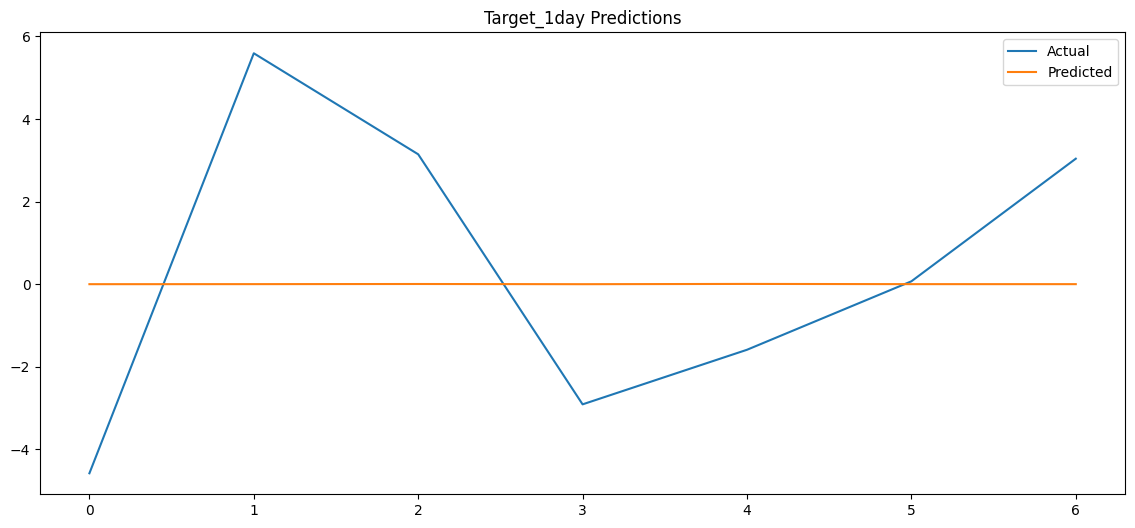


Training Target_1week


KeyError: 'Target_1week'

In [168]:
tft_results = run_tft_pipeline(df)